## Importing Modules

In [5]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline 

## Loading the Dataset

In [2]:
df = pd.read_csv('CardioGoodFitness-1.csv')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


## Info of DataFrame


In [6]:
# Checking the Data Type and Information about the Dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- From the dataset, 6 of the columns are intger data types and 3 object data type.

In [7]:
#Checking for missing value
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- There is no missing value in the dataset but will still need to check if there is an empty string or inconsistences in each of the columns.

In [4]:
df.shape

(180, 9)

- From the dataset there are 180 rows and 9 colums in the dataset.

In [13]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


-  We can see that the average age of the observations is 28.8 years old, with a standard deviation of 6.9 years. The mean income is 53,719 with a standard deviation of 16,506, and the minimum and maximum incomes are 29,562 and 104,581, respectively. Similarly, by analyzing the quartiles, we can also see that the majority of the observations for each variable fall within a certain range. For example, 50% of the observations for age are between 24 and 33 years old, while 50% of the observations for education are between 14 and 16 years. Similarly, 50% of the observations for usage and fitness are between 3 and 4, while 50% of the observations for miles are between 66 and 114.75. 

- Education: The mean education level is 15.6 years, with a standard deviation of 1.6 years. The minimum education level observed is 12 years, and the maximum is 21 years.

- Usage: The mean usage score is 3.5, with a standard deviation of 1.1. The minimum usage score observed is 2, and the maximum is 7.

- Fitness: The mean fitness score is 3.3, with a standard deviation of 0.96. The minimum fitness score observed is 1, and the maximum is 5.

- Miles: The mean number of miles run per week is 103, with a standard deviation of 51.9. The minimum number of miles run per week observed is 21, and the maximum is 360.

## Univariate Analysis
- The goalis to understand the distribution of single variable.
- These is where i focus on the effect a variable may have on a target variable.
### Histogram
- Histogram is used to visualize a single quantitative variable E.g Age, and duration
### The function below is for Numeric

In [14]:
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Create a combined boxplot and histogram for a given feature in a dataframe.

    Args:
    - data: a pandas dataframe
    - feature: a column in the dataframe
    - figsize: the size of the figure (default is (9, 5))
    - kde: whether to show the density curve in the histogram (default is False)
    - bins: number of bins for the histogram (default is None)

    Returns:
    - None
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="mediumturquoise")  # create a boxplot and show the mean with a star
    
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="mediumpurple")  # create a histogram with specified number of bins
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, color="mediumpurple")  # create a histogram without specifying number of bins
    
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label='Mean')  # Add mean to the histogram
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label='Median')  # Add median to the histogram
    ax_hist.legend()
    
    plt.show()


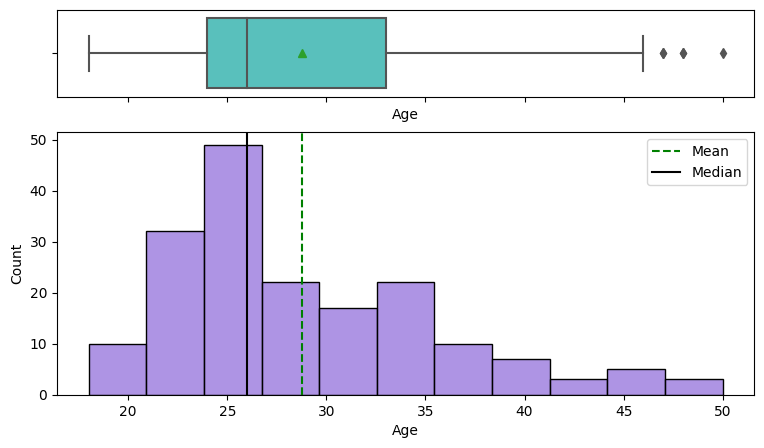

In [15]:
# Distribution of Age 

histogram_boxplot(data = df, feature = 'Age')

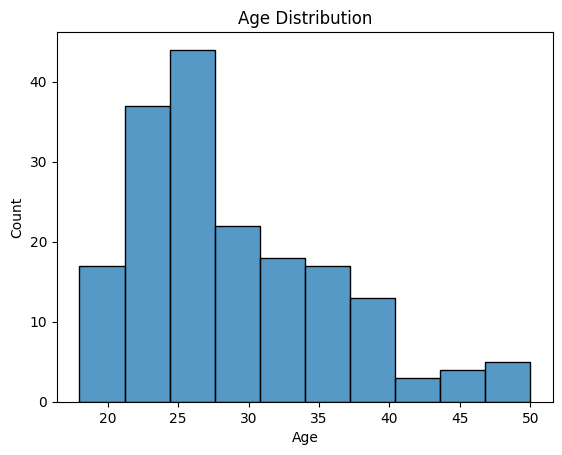

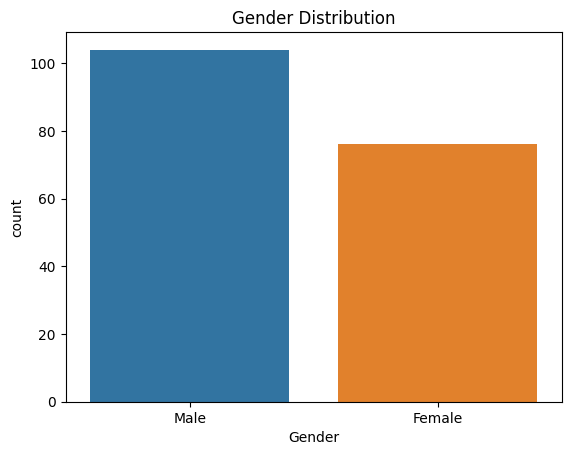

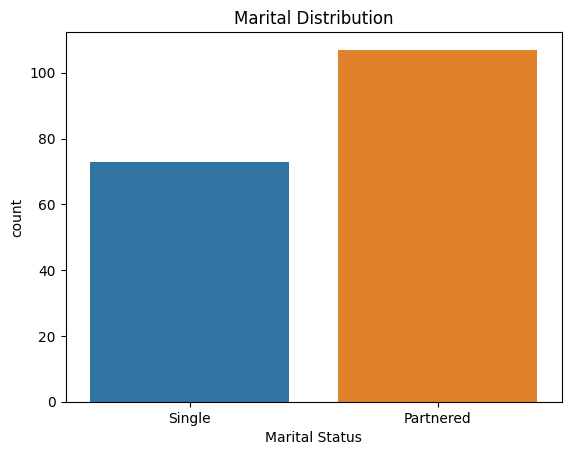

In [26]:
# Age histogram
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Gender countplot
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

# Marital Status countplot
sns.countplot(x='MaritalStatus', data=df)
plt.title('Marital Distribution')
plt.xlabel('Marital Status')
plt.show()

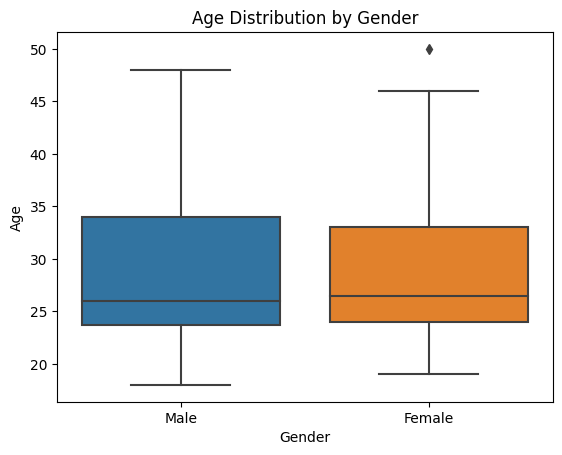

In [20]:
# Box plot of Age by Gender
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

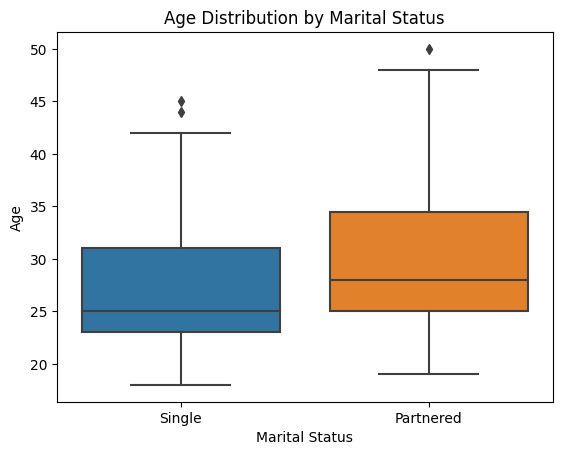

In [22]:
# Box plot of Age by Marital Status
sns.boxplot(x='MaritalStatus', y='Age', data=df)
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

- The boxplot shows that the mean age of Partner is relatively high than Signle

In [29]:
# Determine if there is a significant association between Age and Marital Status
import scipy.stats as stats
rel_mar = pd.crosstab(df['Age'], df['MaritalStatus'])
chi2, p, dof, expected = stats.chi2_contingency(rel_mar)
print('Chi-squared test statistic:', chi2)
print('P-value:', p)

Chi-squared test statistic: 37.19238436636977
P-value: 0.20528003122786012


- There is no association between the variables). In this case, the p-value is 0.205, which is greater than the commonly used significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis and we can conclude that there is no significant association between the two variables at the 5% level of significance.

In [30]:
# Determine if there is a significant association between Education and Marital Status
import scipy.stats as stats
rel_mar = pd.crosstab(df['Education'], df['MaritalStatus'])
chi2, p, dof, expected = stats.chi2_contingency(rel_mar)
print('Chi-squared test statistic:', chi2)
print('P-value:', p)

Chi-squared test statistic: 5.673948807610726
P-value: 0.5782936251179229
